# Homework 2: Introduction to SVMs

------------------------------------------------------
*Machine Learning, Master in Big Data Analytics, 2017-2018*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------


**ALPER KOCABIYIK**

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# use seaborn plotting defaults
import seaborn as sns; sns.set()

In this homework, you will work with the following dataset

In [50]:
data=np.load('DataSet1.npz') 
X_train=data['arr_0']
Y_train=data['arr_1']
X_test=data['arr_2']

Let's plot it to have an idea about how it looks:

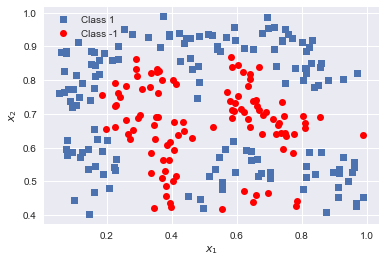

In [51]:
min1=np.min(X_train[:,0])
max1=np.max(X_train[:,0])
min2=np.min(X_train[:,1])
max2=np.max(X_train[:,1])



## Plot Data
index=(Y_train==1).reshape(Y_train.shape[0],)
plt.plot(X_train[index,0],X_train[index,1],'s',label="Class 1")
index=(Y_train==0).reshape(Y_train.shape[0],)
plt.plot(X_train[index,0],X_train[index,1],'ro',label="Class -1")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.rcParams["figure.figsize"] = [8,8]

** Question 1 (1 point)** Hold out part of the training data to create a validation. For instance, take the 20% of the data points at random for validation.

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

** Question 2 (4 points)** Train a SVM with a linear kernel. Plot the decision boundary and the $\pm 1$-distance to boundary contour levels. 

Use different values of $C$ and analyze the evolution of the number of support vectors as you vary this quantity. Explain the results!

Compute and plot the classification error rate for both training and validation sets as a function of $C$.

Do you think a linear kernel is adequate in this case?

In [53]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:            #If no figure handle is provided, it opens the current figure
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)    #30 points in the grid axis
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)                 # We create a grid with the x,y coordinates defined above
    
    # From the grid to a list of (x,y) values. 
    # Check Numpy help for ravel()
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T 
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    # In levels we provide a list of floating point numbers indicating 
    #the level curves to draw, in increasing order; e.g., to draw just the zero contour pass
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, marker='p')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

C:\Users\alper\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train set: Test error for C=10000 is: 0.5
Validation set: Test error for C=10000 is: 0.48
Number of support vectors=[88 89]

---------------------------------------------

Train set: Test error for C=1000000 is: 0.5449999999999999
Validation set: Test error for C=1000000 is: 0.5
Number of support vectors=[86 86]

---------------------------------------------

Train set: Test error for C=100000000 is: 0.51
Validation set: Test error for C=100000000 is: 0.52
Number of support vectors=[64 66]

---------------------------------------------

Train set: Test error for C=10000000000 is: 0.51
Validation set: Test error for C=10000000000 is: 0.54
Number of support vectors=[62 62]

---------------------------------------------



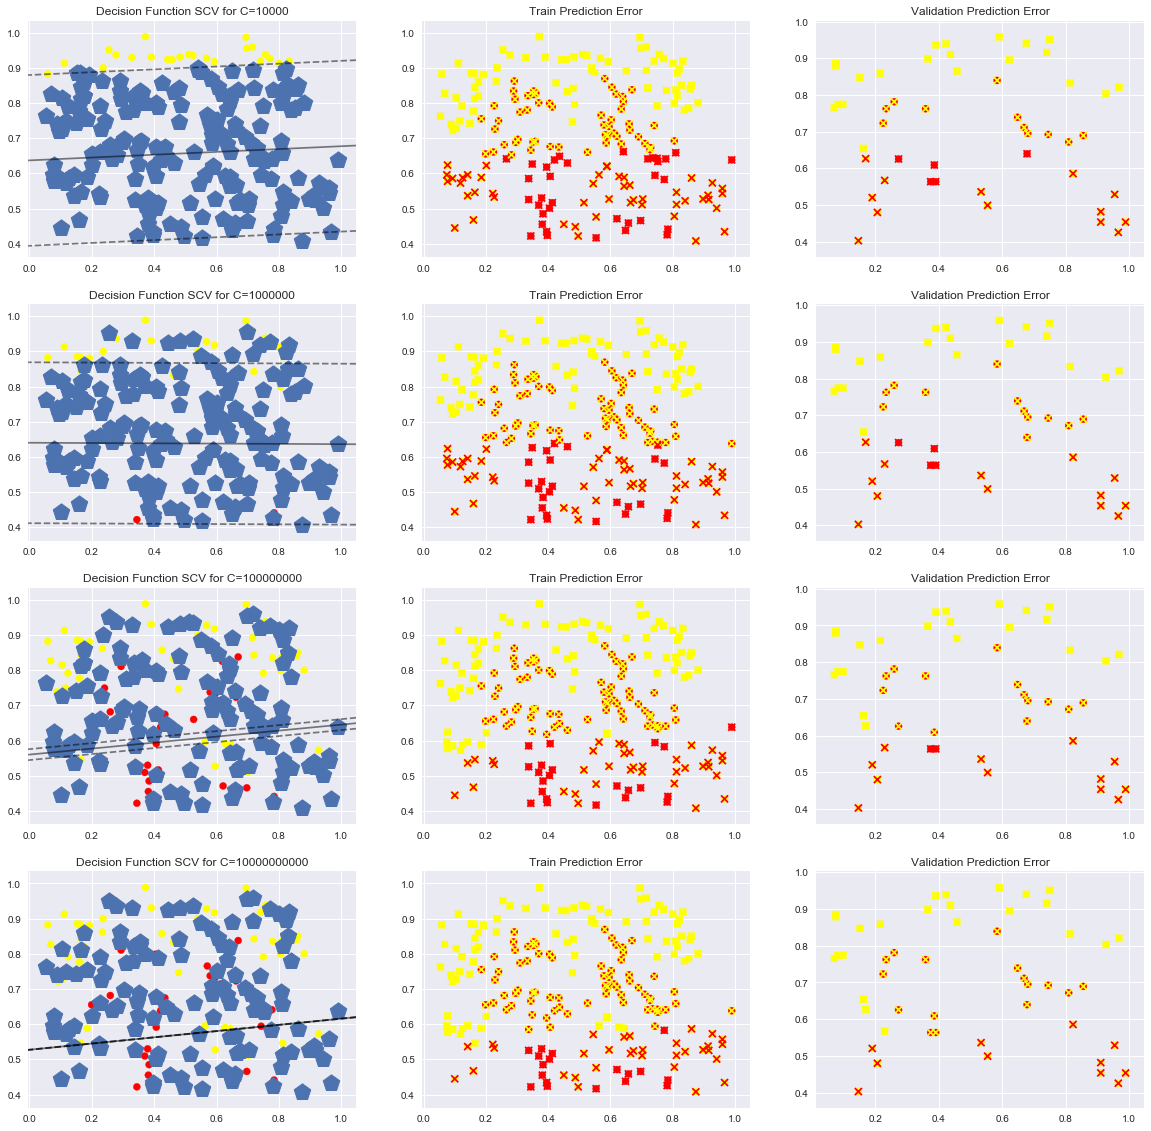

Text(0.5,1,'Error rates with different C values')

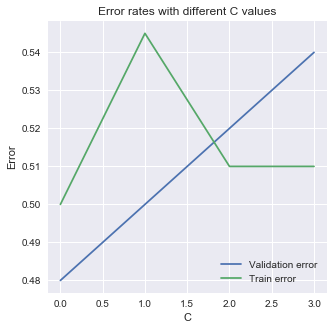

In [85]:
from sklearn.svm import SVC
errorlist=[]
errorlist_train=[]
f, axes = plt.subplots(4, 3, figsize=(20,20))

for exponent_C in range(2,6):
    model = SVC(kernel='linear', C=100 ** exponent_C)
    model.fit(X_train, Y_train)
    
    accuracy = model.score(X_val, Y_val)
    Y_pred = model.predict(X_val)
    
    accuracy_train = model.score(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    
    print ("Train set: Test error for C=%s is: %s" %(100**exponent_C,1-accuracy_train))
    errorlist_train.append(1-accuracy_train)
    print ("Validation set: Test error for C=%s is: %s" %(100**exponent_C, 1 - accuracy))
    errorlist.append(1 - accuracy)
    print ("Number of support vectors=%s" %model.n_support_)
    print ("\n---------------------------------------------\n")
    
    plt.subplot(axes[exponent_C-2,0])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train[:,0], s=50, cmap='autumn')
    plot_svc_decision_function(model)
    plt.title('Decision Function SCV for C=%s' %100**exponent_C)
        
    plt.subplot(axes[exponent_C-2,2])
    plt.scatter(X_val[:, 0], X_val[:, 1], c=Y_val[:,0], s=50, cmap='autumn')
    plt.scatter(X_val[:, 0], X_val[:, 1], c=Y_pred, s=50, cmap='autumn',marker='x')
    plt.title('Validation Prediction Error')
    
    plt.subplot(axes[exponent_C-2,1])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train[:,0], s=50, cmap='autumn')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_pred_train, s=50, cmap='autumn',marker='x')
    plt.title('Train Prediction Error')
    
plt.show()
    
plt.figure(figsize=(5,5))
plt.plot(errorlist, label="Validation error")
plt.plot(errorlist_train, label="Train error")
plt.legend()
plt.xlabel("C")
plt.ylabel("Error")
plt.title("Error rates with different C values")

**Linear kernel is not adequate clearly seen from the plots and error rates. Even from the first plot (data visualization) its seen that there are possible class overlaps. For the C value; while C value is increasing, error rate is increasing. At the sae time, number of support vectors are decreasing**

** Question 3 (5 points)** Train a SVM with a RBF kernel with bandwith $\gamma$. Plot the decision boundary and the $\pm 1$-distance to boundary contour levels. 

Use different values of $(C,\gamma)$ and analyze the evolution of the number of support vectors as you vary these quantities. For instance, fix $\gamma=1$ and vary $C$ and the other way around. Explain the results! Plotting the decision boundary and support vectors will help you to understand what's going on.

Note: check [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) to see how to vary $\gamma$.

For different values of $\gamma$, compute and plot the classification error rate for both training and validation sets as a function of $C$.


C:\Users\alper\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train set: Test error for C=10000, gamma=1e-06 is: 0.43999999999999995
Validation set: Test error for C=10000, gamma=1e-06 is: 0.31999999999999995
Number of support vectors=[88 89]
---------------------------------------------

Train set: Test error for C=10000, gamma=0.0001 is: 0.43999999999999995
Validation set: Test error for C=10000, gamma=0.0001 is: 0.31999999999999995
Number of support vectors=[88 89]
---------------------------------------------

Train set: Test error for C=10000, gamma=0.01 is: 0.235
Validation set: Test error for C=10000, gamma=0.01 is: 0.19999999999999996
Number of support vectors=[83 83]
---------------------------------------------

Train set: Test error for C=10000, gamma=1 is: 0.10999999999999999
Validation set: Test error for C=10000, gamma=1 is: 0.020000000000000018
Number of support vectors=[41 42]
---------------------------------------------



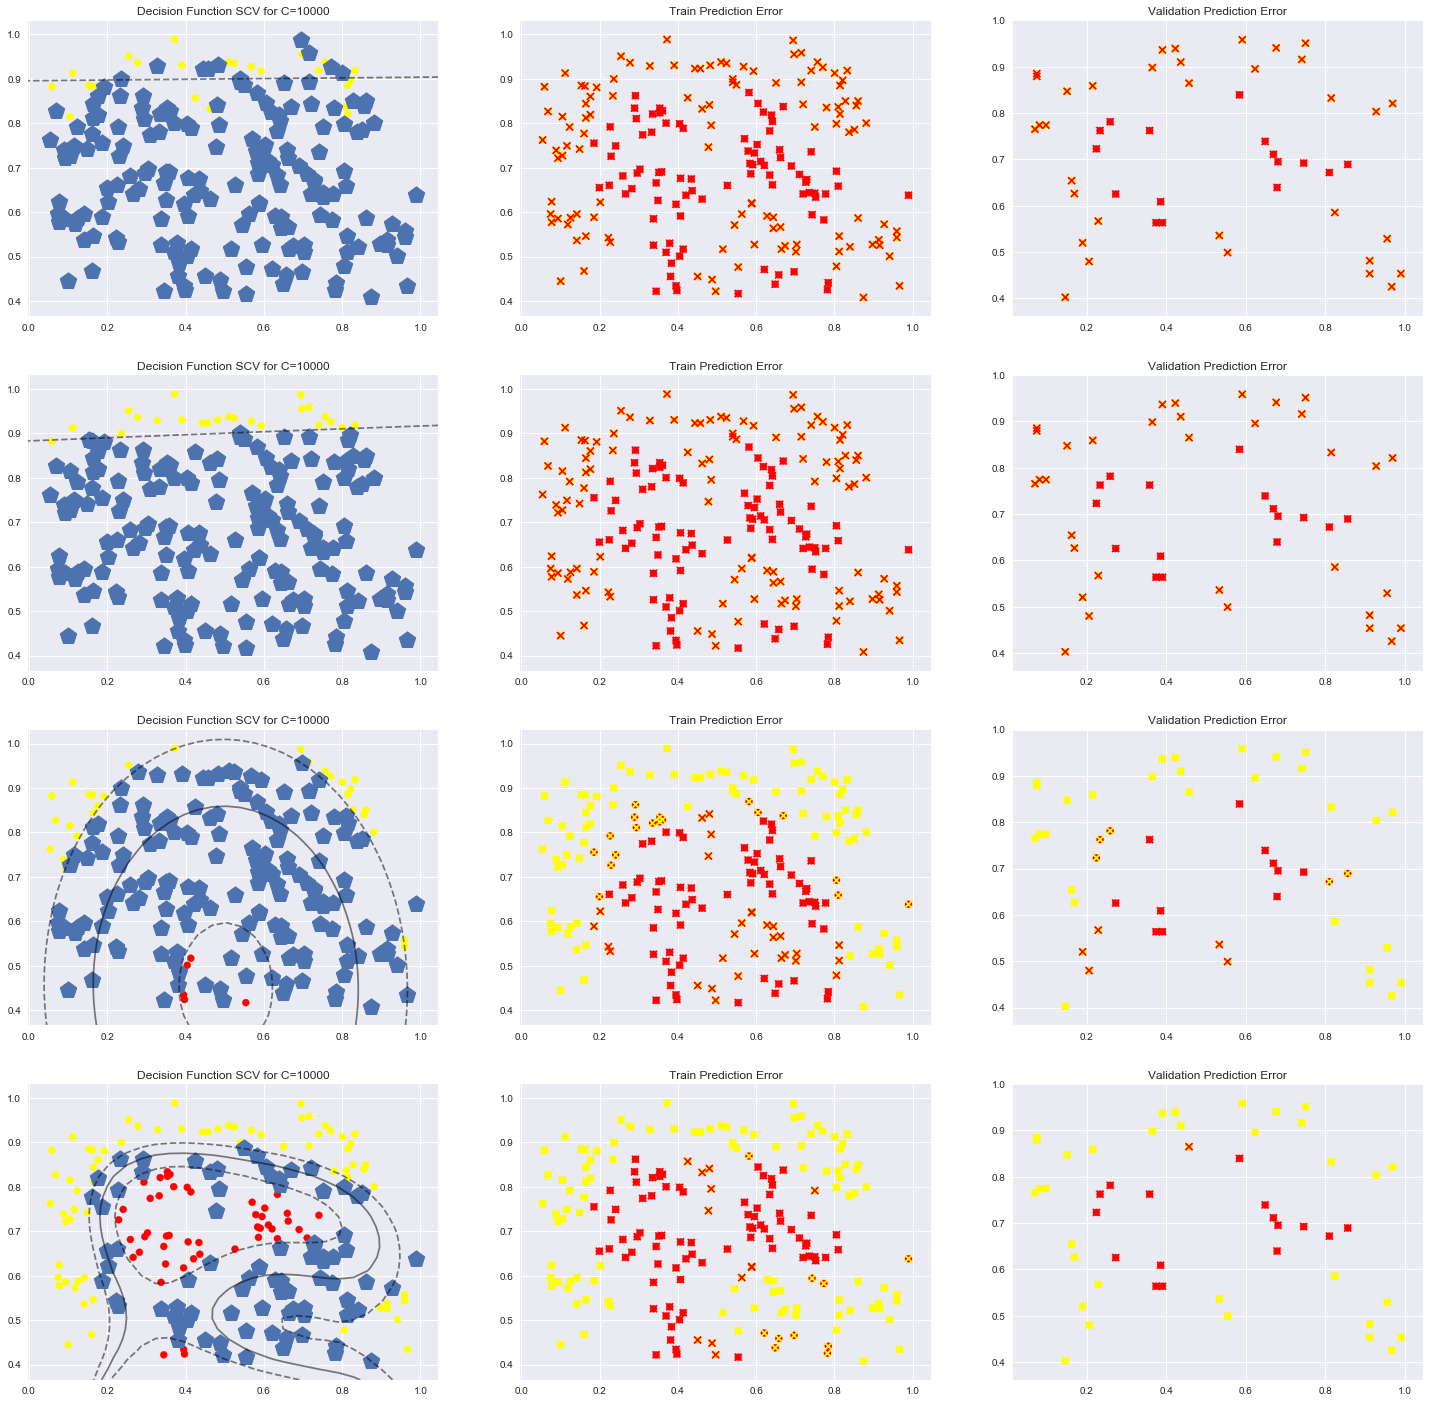

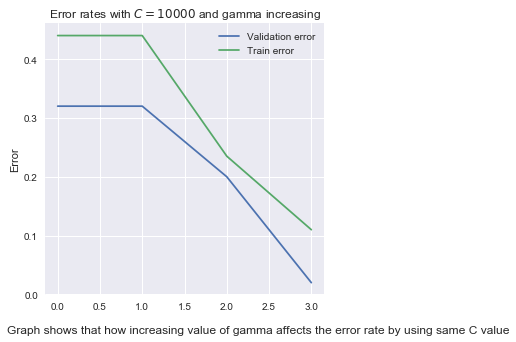


###################################################################

Train set: Test error for C=1000000, gamma=1e-06 is: 0.42500000000000004
Validation set: Test error for C=1000000, gamma=1e-06 is: 0.36
Number of support vectors=[88 90]
---------------------------------------------

Train set: Test error for C=1000000, gamma=0.0001 is: 0.515
Validation set: Test error for C=1000000, gamma=0.0001 is: 0.48
Number of support vectors=[87 88]
---------------------------------------------

Train set: Test error for C=1000000, gamma=0.01 is: 0.17500000000000004
Validation set: Test error for C=1000000, gamma=0.01 is: 0.12
Number of support vectors=[50 53]
---------------------------------------------

Train set: Test error for C=1000000, gamma=1 is: 0.06000000000000005
Validation set: Test error for C=1000000, gamma=1 is: 0.040000000000000036
Number of support vectors=[28 27]
---------------------------------------------



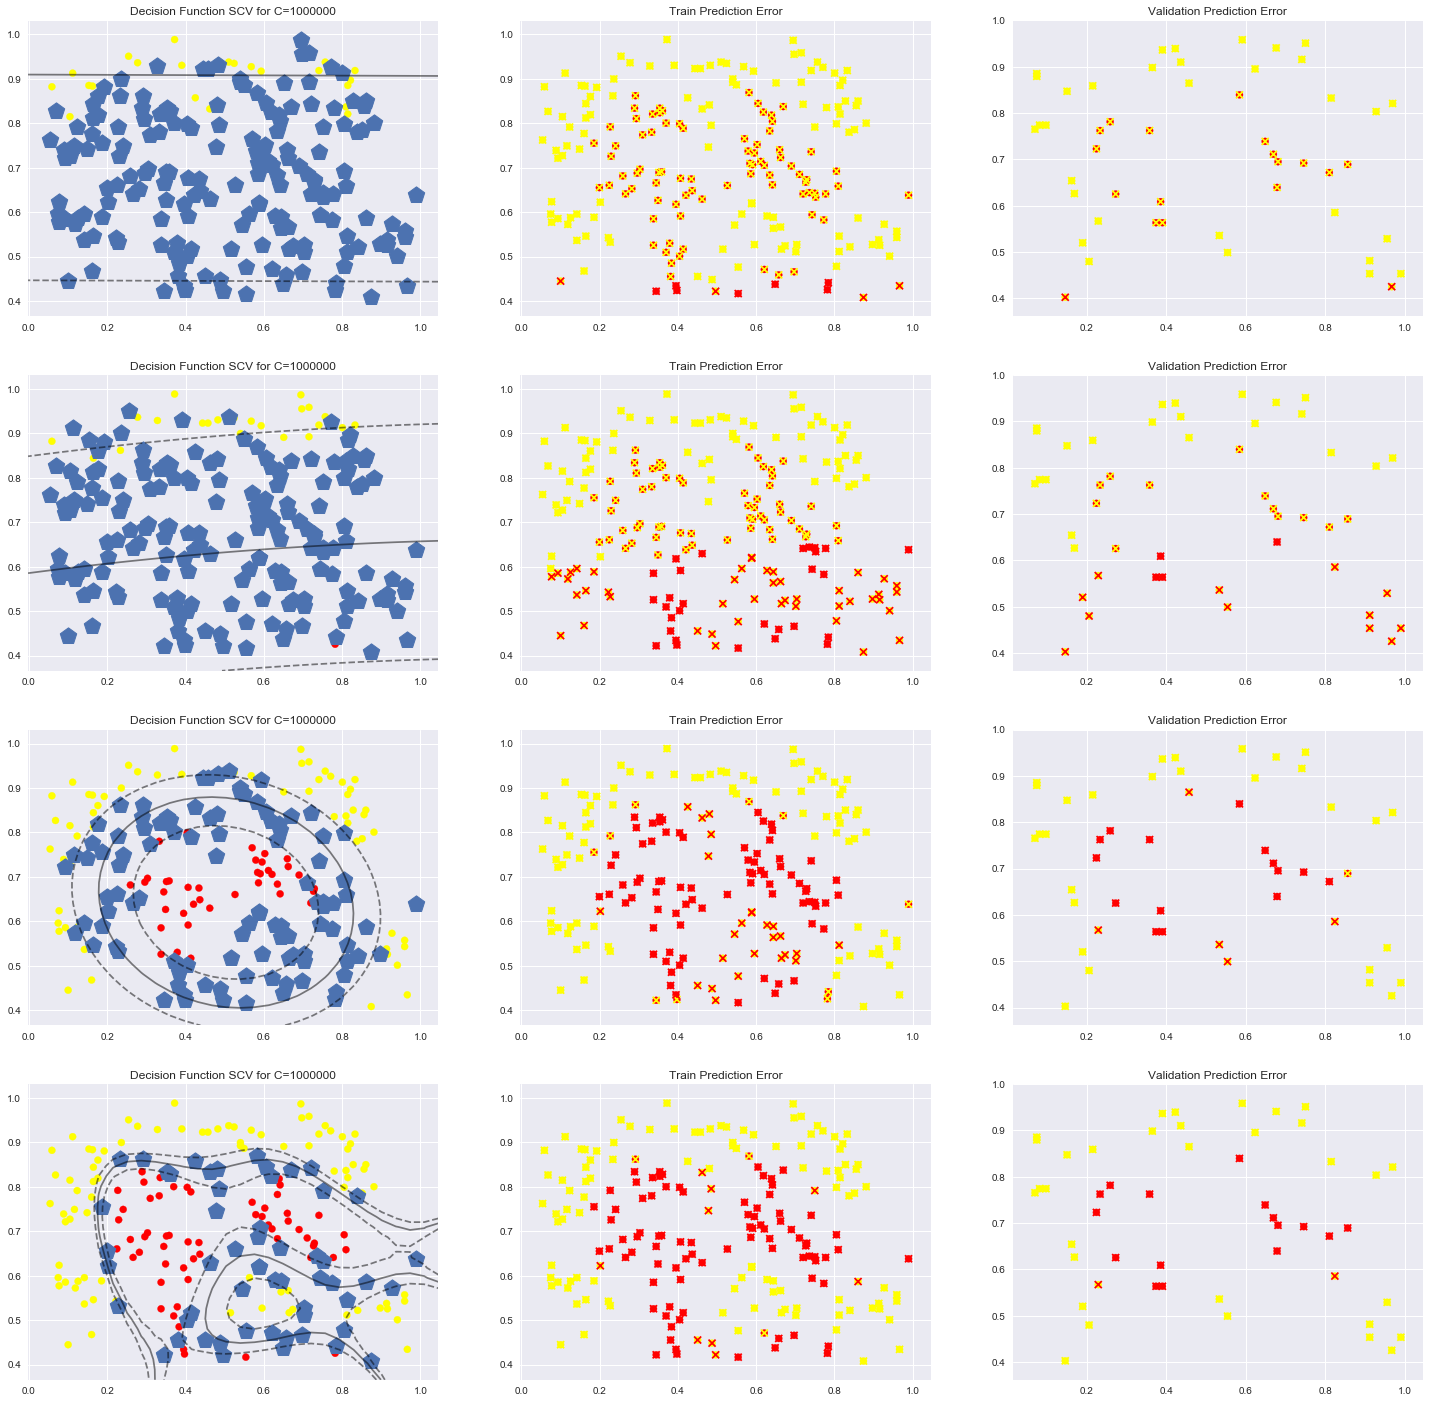

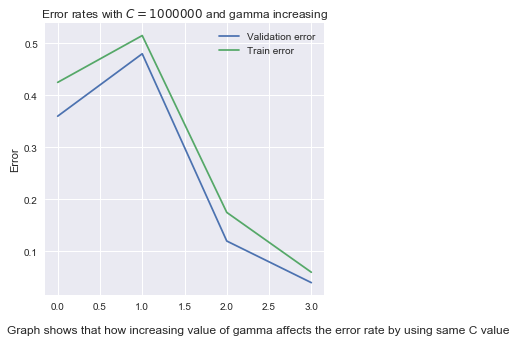


###################################################################

Train set: Test error for C=100000000, gamma=1e-06 is: 0.5449999999999999
Validation set: Test error for C=100000000, gamma=1e-06 is: 0.52
Number of support vectors=[50 50]
---------------------------------------------

Train set: Test error for C=100000000, gamma=0.0001 is: 0.44999999999999996
Validation set: Test error for C=100000000, gamma=0.0001 is: 0.4
Number of support vectors=[56 58]
---------------------------------------------

Train set: Test error for C=100000000, gamma=0.01 is: 0.21999999999999997
Validation set: Test error for C=100000000, gamma=0.01 is: 0.12
Number of support vectors=[36 36]
---------------------------------------------

Train set: Test error for C=100000000, gamma=1 is: 0.040000000000000036
Validation set: Test error for C=100000000, gamma=1 is: 0.06000000000000005
Number of support vectors=[15 13]
---------------------------------------------



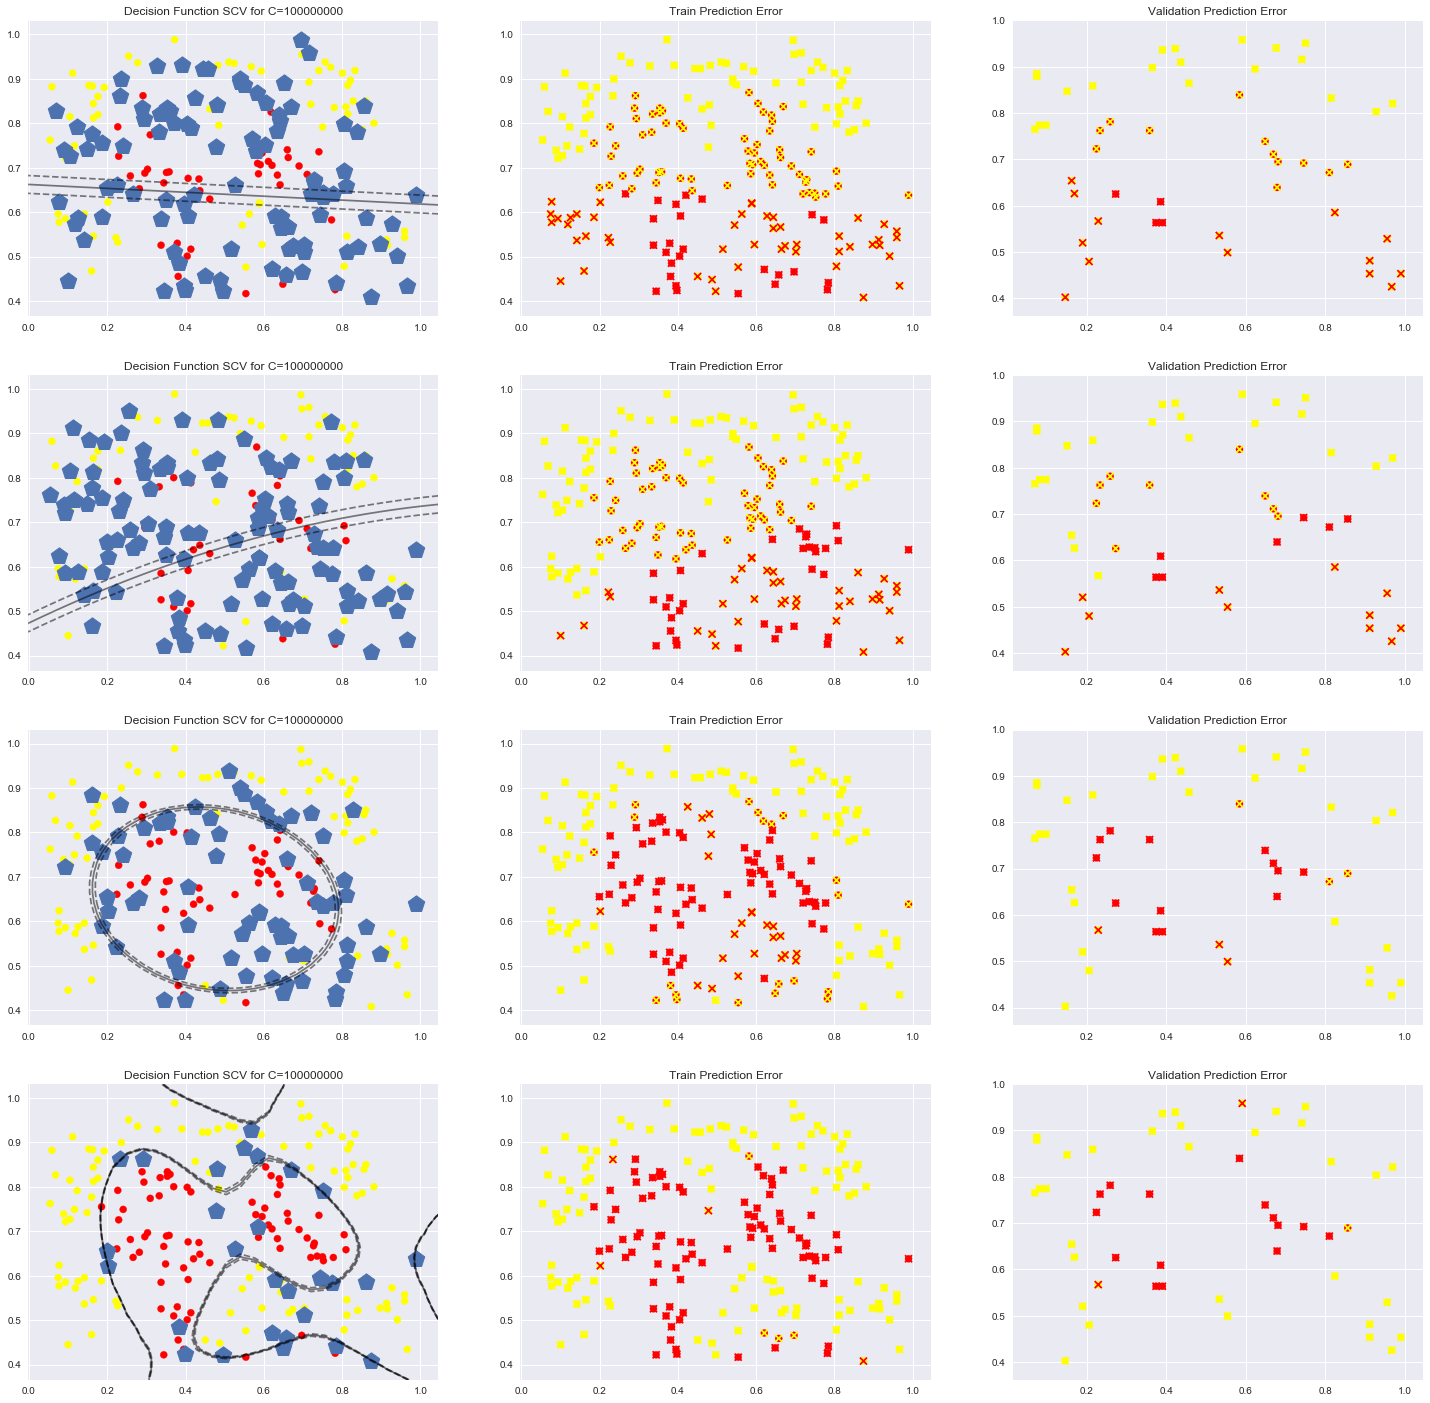

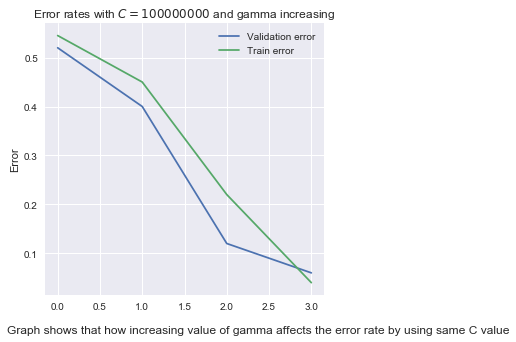


###################################################################

Train set: Test error for C=10000000000, gamma=1e-06 is: 0.5
Validation set: Test error for C=10000000000, gamma=1e-06 is: 0.56
Number of support vectors=[50 50]
---------------------------------------------

Train set: Test error for C=10000000000, gamma=0.0001 is: 0.46499999999999997
Validation set: Test error for C=10000000000, gamma=0.0001 is: 0.52
Number of support vectors=[56 56]
---------------------------------------------

Train set: Test error for C=10000000000, gamma=0.01 is: 0.24
Validation set: Test error for C=10000000000, gamma=0.01 is: 0.14
Number of support vectors=[36 37]
---------------------------------------------

Train set: Test error for C=10000000000, gamma=1 is: 0.04500000000000004
Validation set: Test error for C=10000000000, gamma=1 is: 0.07999999999999996
Number of support vectors=[11 12]
---------------------------------------------



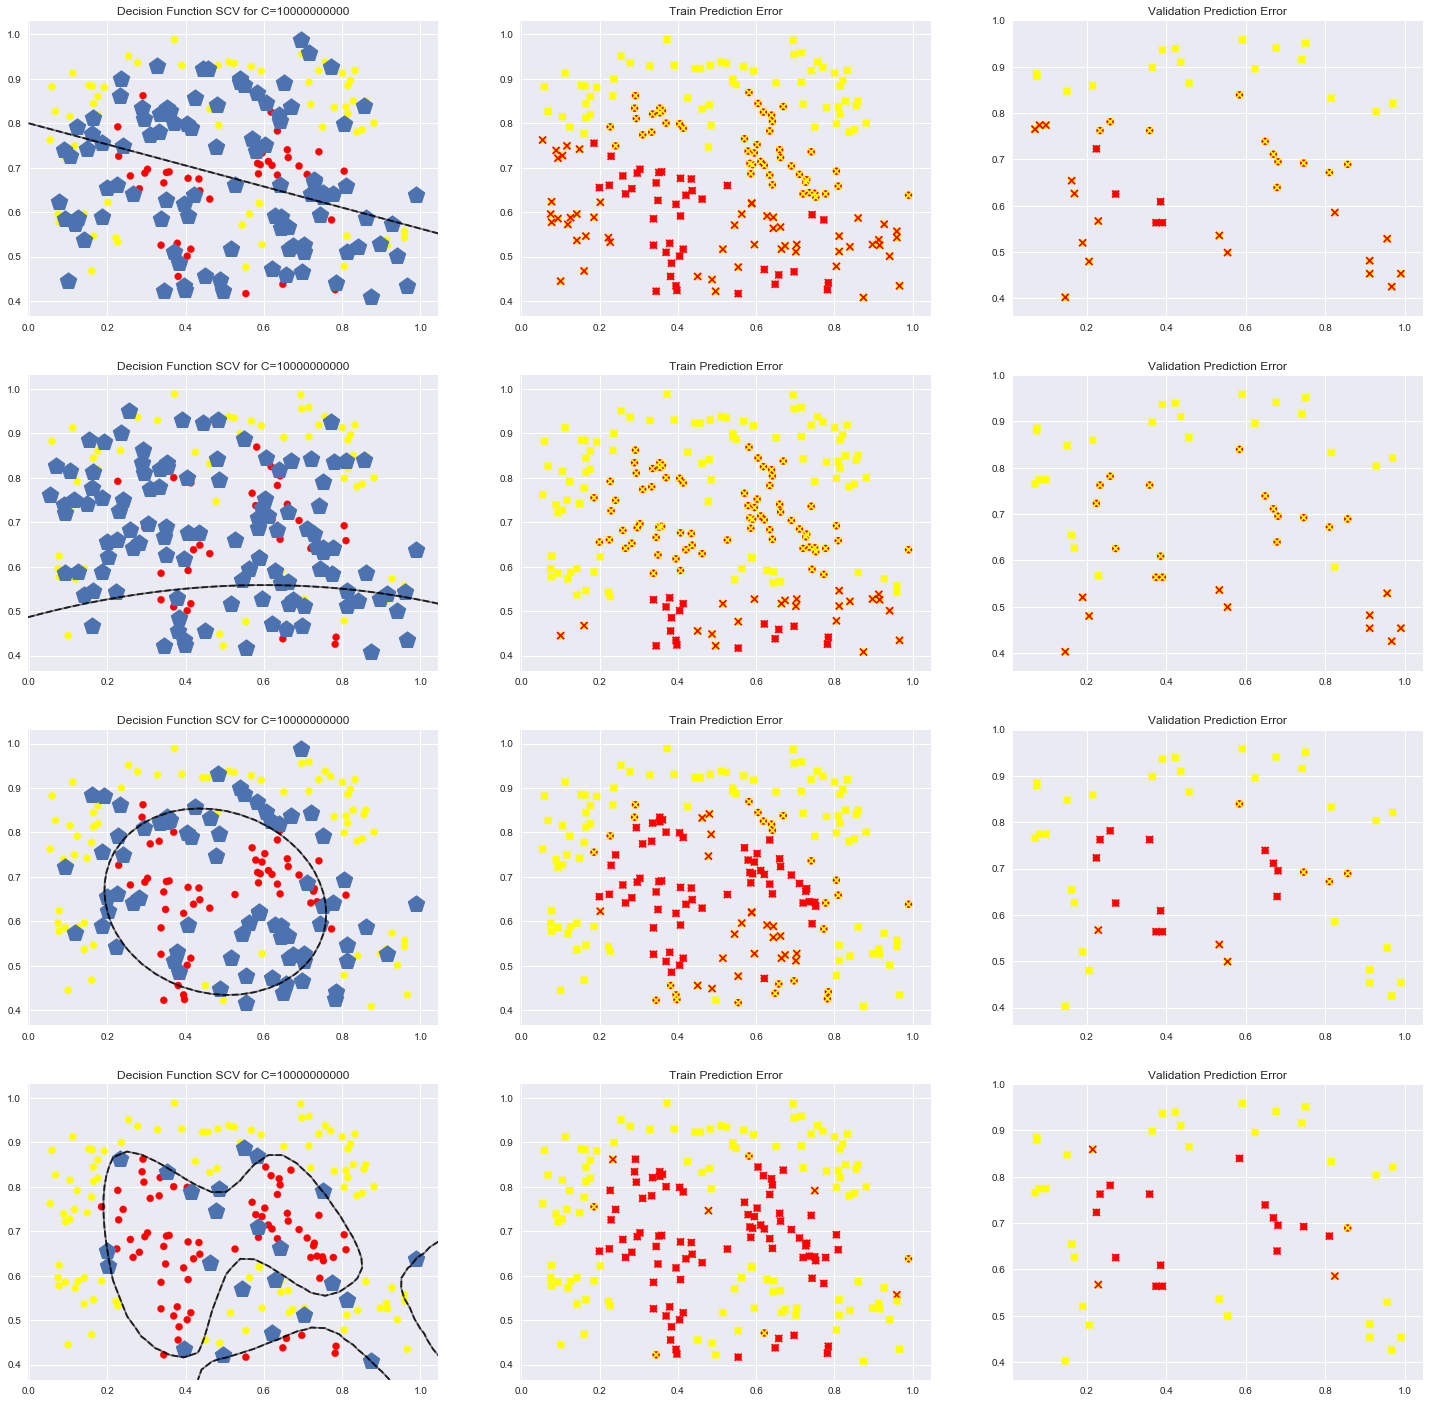

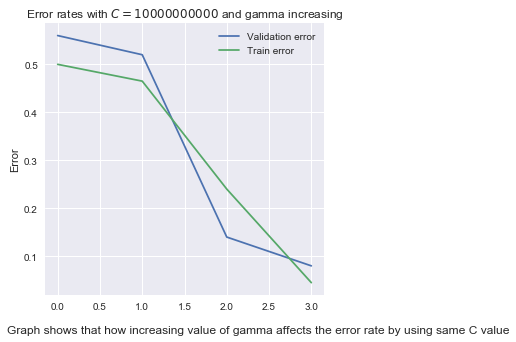


###################################################################



In [87]:
from pylab import *
errorlist_c_g=[]
errorlist_train_c_g=[]

for exponent_C in range(2, 6):
    f, axes = plt.subplots(4, 3, figsize=(25,25))
    for gama in range(3,-1,-1):
        model = SVC(kernel='rbf', C=100 ** exponent_C, gamma=10**(-2*gama))
        model.fit(X_train, Y_train)
        
        accuracy = model.score(X_val, Y_val)
        Y_pred = model.predict(X_val)
        
        accuracy_train = model.score(X_train, Y_train)
        Y_pred_train = model.predict(X_train)
        
        print ("Train set: Test error for C=%s, gamma=%s is: %s" %(100**exponent_C, 10**(-2*gama),1 - accuracy_train))
        errorlist_train_c_g.append(1-accuracy_train)
        print ("Validation set: Test error for C=%s, gamma=%s is: %s" %(100**exponent_C, 10**(-2*gama),1 - accuracy))
        errorlist_c_g.append(1 - accuracy)
        print ("Number of support vectors=%s" %model.n_support_)
        print ("---------------------------------------------\n")
        
        plt.subplot(axes[3-gama,0])
        plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train[:,0], s=50, cmap='autumn')
        plot_svc_decision_function(model)
        plt.title('Decision Function SCV for C=%s' %100**exponent_C)
        
        plt.subplot(axes[3-gama,2])
        plt.scatter(X_val[:, 0], X_val[:, 1], c=Y_val[:,0], s=50, cmap='autumn')
        plt.scatter(X_val[:, 0], X_val[:, 1], c=Y_pred, s=50, cmap='autumn',marker='x')
        plt.title('Validation Prediction Error')
    
        plt.subplot(axes[3-gama,1])
        plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train[:,0], s=50, cmap='autumn')
        plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_pred_train, s=50, cmap='autumn',marker='x')
        plt.title('Train Prediction Error')
    
    plt.show()
    
    plt.figure(figsize=(5,5))
    plt.plot(errorlist_c_g, label="Validation error")
    plt.plot(errorlist_train_c_g, label="Train error")
    plt.ylabel("Error")
    plt.title("Error rates with $C=%s$ and gamma increasing" %(100 ** exponent_C))
    figtext(.02, .02, "Graph shows that how increasing value of gamma affects the error rate by using same C value")
    plt.legend()
    plt.show()
    print ("\n###################################################################\n")
    del errorlist_c_g[:]
    del errorlist_train_c_g[:]
    

**As it clearly seen by comparing 2 types of kernels, RBF gives much better results for this problem. Here I did the experiment with different C values and different gamma values. While C value is increasing, error rate is decreasing and number of support vectors are decreasing for the same gamma values. Likewise, while gamma is increasing error rate tend to decrease and number of support vectors are decreasing for the same C values. **